In [1]:
from matplotlib import pyplot as plt
from Architectures.AE import AE
from Architectures.GAN import GAN
from Architectures.VAE import VAE
from Architectures.PCA import PCA
from Data.load import load
import numpy as np
from Metrics.metrics import NRMSE

In [3]:
groups = {
    group: load(f"Pre-processed/{group}",train_test_split=1) # take=5
    for group in ["CN","MCI","AD"]
}

Loading AD: 100%|██████████| 26/26 [00:12<00:00,  2.07it/s]


In [4]:
models = {
    "AE-10": AE.open("Trained Models/AE/10"),
    "AE-30": AE.open("Trained Models/AE/30"),
    "AE-50": AE.open("Trained Models/AE/50"),
    "AE-100": AE.open("Trained Models/AE/100"),
    "AE-300": AE.open("Trained Models/AE/300"),
    "AE-360": AE.open("Trained Models/AE/360"),
    "AE-500": AE.open("Trained Models/AE/500"),
    "AE-1000": AE.open("Trained Models/AE/1000"),
    "AE-256.1": AE.open("Trained Models/AE/optimal_depths/(1, 1, 1)"),
    "AE-256.2": AE.open("Trained Models/AE/optimal_depths/(2, 4, 8)"),
    "AE-256.3": AE.open("Trained Models/AE/optimal_depths/(4, 8, 16)"),
    "AE-256.4": AE.open("Trained Models/AE/optimal_depths/(8, 16, 32)"),
    # "VAE-100": VAE.open("Trained Models/VAE/100"),
    # "PCA-30K": PCA.open("Trained Models/PCA/30k"),
}

Models loaded and compiled successfully.
Models loaded and compiled successfully.
Models loaded and compiled successfully.
Models loaded and compiled successfully.
Models loaded and compiled successfully.
Models loaded and compiled successfully.
Models loaded and compiled successfully.
Models loaded and compiled successfully.
Models loaded and compiled successfully.
Models loaded and compiled successfully.
Models loaded and compiled successfully.
Models loaded and compiled successfully.


In [5]:
def get_recon_loss(model, x, metric = NRMSE):
    latent = model.encode(x)
    recon = model.decode(latent)
    return np.array([metric(recon[i],x[i]) for i in range(len(x))])

def get_recon_loss_all(model, groups, metric = NRMSE):
    return {g_name: get_recon_loss(model, g_x, metric) for g_name, g_x in groups.items()}

model_losses = {m_name:get_recon_loss_all(m, groups) for m_name, m in models.items()}
model_losses

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 391ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 370ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 783ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
11/11 ━━━━━━━━━━━━

{'AE-10': {'CN': array([0.1063817 , 0.08910291, 0.0928139 , 0.09547152, 0.10029099,
         0.11271713, 0.10635587, 0.07730886, 0.07459105, 0.10668263,
         0.09542469, 0.07703457, 0.08130801, 0.08939892, 0.07623875,
         0.09191638, 0.06076771, 0.08388228, 0.08558905, 0.07568401,
         0.08175707, 0.07895554, 0.08159984, 0.1024762 , 0.08416017,
         0.1033768 , 0.09016973, 0.09387392, 0.0956705 , 0.10196063,
         0.08263673, 0.08617924, 0.09192348, 0.09495869, 0.11087415,
         0.0901812 , 0.06787329, 0.1024762 , 0.08416017, 0.1033768 ,
         0.09016973, 0.09387392, 0.0956705 , 0.10196063, 0.075431  ,
         0.10220102, 0.08972576, 0.09495869, 0.11087415, 0.09650216,
         0.1035171 , 0.08436585, 0.07862629, 0.0757216 , 0.09429387,
         0.09321553, 0.09515057, 0.10581569, 0.10379353, 0.10577237,
         0.09486385, 0.07503336, 0.09604876, 0.09215886, 0.08117857,
         0.08440554, 0.09915691, 0.08607762, 0.07074147, 0.0885799 ,
         0.08106115

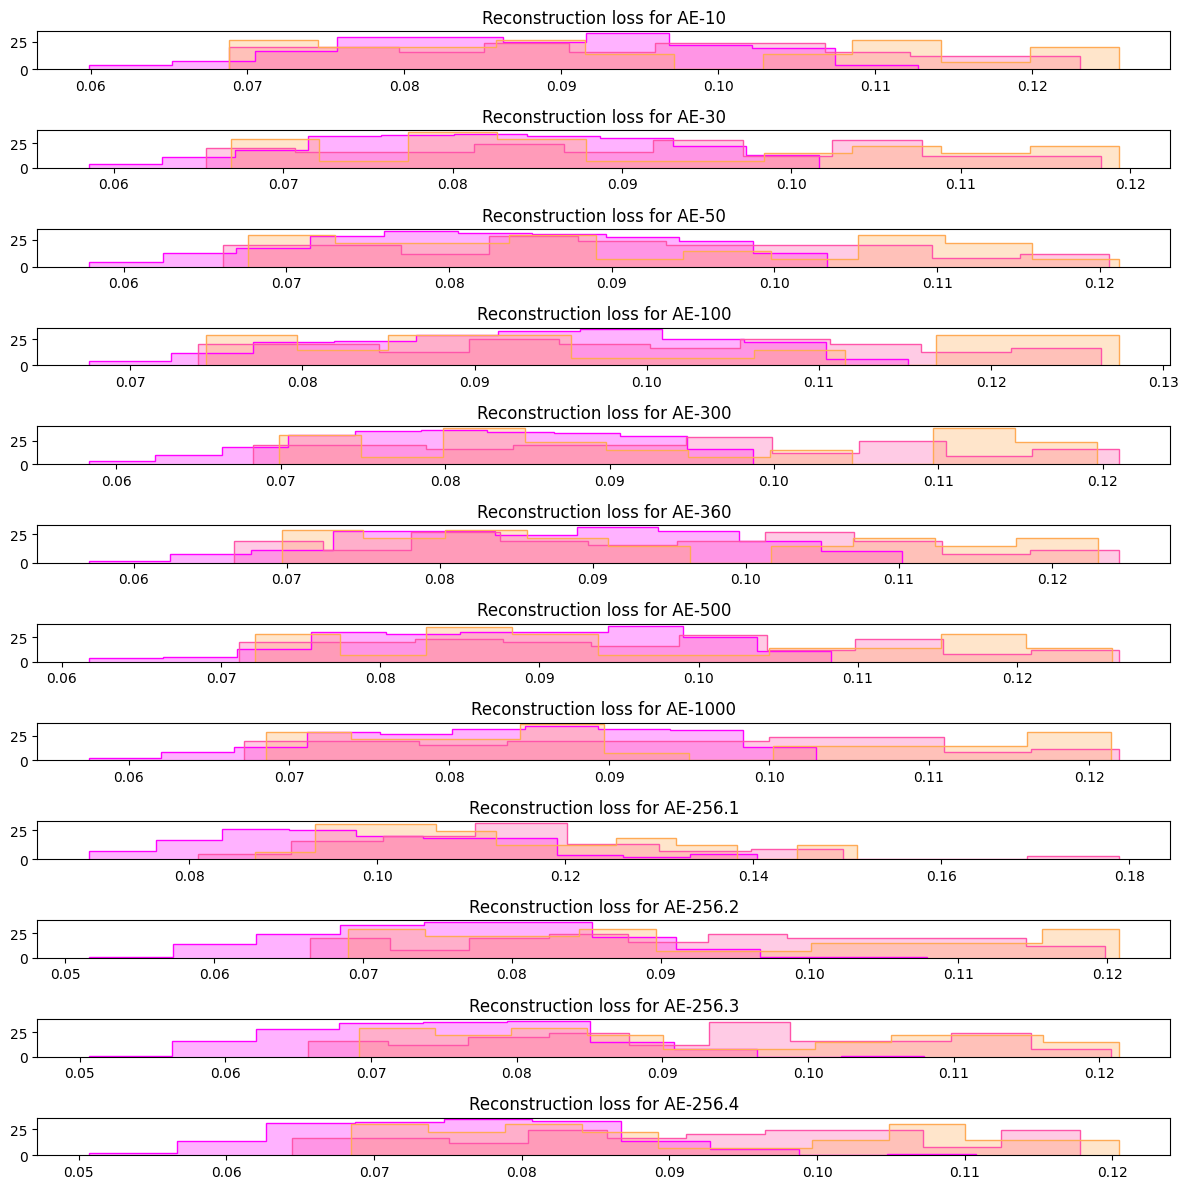

In [13]:
cmap = plt.get_cmap("spring")  # Get the "spring" colormap
plt.figure(figsize=(12,12))
num_groups = max(len(m_loss) for m_loss in model_losses.values())  # Max number of groups in any model

row_idx = 1
for m_name, m_loss in model_losses.items():
    plt.subplot(len(model_losses), 1, row_idx)
    plt.title(f"Reconstruction loss for {m_name}")
    
    for i, (g_name, g_loss) in enumerate(m_loss.items()):
        color = cmap(i / num_groups)  # Get a color from the colormap
        plt.hist(g_loss, label=g_name, color=color, alpha=0.3, density=True) # Fill
        plt.hist(g_loss, color=color, histtype="step", density=True) # Outline
    
    # plt.legend()
    row_idx += 1

plt.tight_layout()
plt.show()


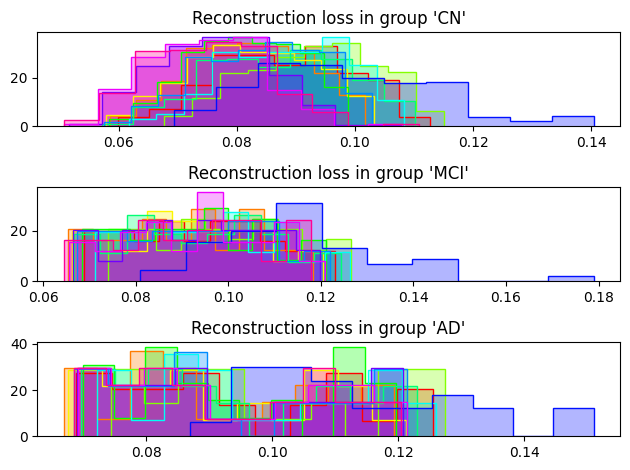

In [15]:
cmap = plt.get_cmap("hsv")  # Get the "spring" colormap
num_groups = len(models)

row_idx = 1
for group_name in groups:
    plt.subplot(len(groups), 1, row_idx)
    plt.title(f"Reconstruction loss in group '{group_name}'")
    for i, (m_name, m_loss) in enumerate(model_losses.items()):
        color = cmap(i / num_groups)  # Get a color from the colormap
        plt.hist(m_loss[group_name], label=m_name, color=color, alpha=0.3, density=True) # Fill
        plt.hist(m_loss[group_name], color=color, histtype="step", density=True) # Outline
    
    # plt.legend()
    row_idx += 1

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Mean reconstruction loss')

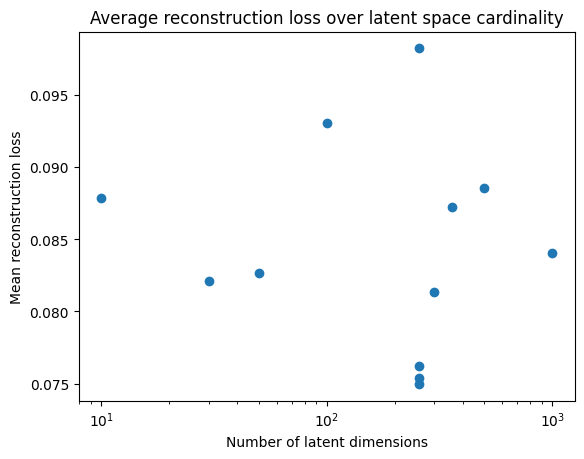

In [17]:
dim = {m_name: float(m_name[m_name.index("-")+1:]) for m_name in models}
mean_loss = {m_name: np.mean(m_loss["CN"]) for m_name, m_loss in model_losses.items()}
plt.scatter(dim.values(), mean_loss.values())
plt.xscale("log")
plt.title("Average reconstruction loss over latent space cardinality")
plt.xlabel("Number of latent dimensions")
plt.ylabel("Mean reconstruction loss")